# Алгоритм шифрования ANUBIS


### Выполнил: студент 447 группы радиофизического факультета ННГУ им. Н.И. Лобачевского
### Булычев Никита

### Преподаватель: Лапинова С.А.
     


## История алгоритма Anubis

Алгоритм был разработан в 2000 году авторами бельгийцем **Винсентом Риджменом** и бразильцем **Пауло Баррето**. Данный алгоритм является наследником разработанного Винсентом Риджменом ранее алгоритма **Rijndael**, их объединяет относительно редко встречающаяся структура  типа *квадрат* и весьма схожий набор выполняемых преобразований.

Алгоритм назван в честь древнеегипетского бога *Анубиса* - бога бальзамирования и погребения; к его ведению авторы решили отнести и криптографию.

Алгоритм шифрует данные блоками по 128 бит с использованием ключа размером 128 бит с возможностью расширения до 320 бит с шагом в 32 бита.

## Теоречтическая часть

Алгоритм представляет данные ввиде 16 - байтового массива. В каждом раунде выполняются следующие действия:

**1.** Табличная замена, выполняемая согласно таблице S. Значения таблицы выбраны псевдослучайным образом с учетом необходимости ее соответствия следующему соотношению:
$$S(S(x))=x$$


##### Таблица S:

public static final byte box[] = { 
			(byte)0xa7, (byte)0xd3, (byte)0xe6, (byte)0x71, (byte)0xd0, (byte)0xac, (byte)0x4d, (byte)0x79,
			(byte)0x3a, (byte)0xc9, (byte)0x91, (byte)0xfc, (byte)0x1e, (byte)0x47, (byte)0x54, (byte)0xbd,
			(byte)0x8c, (byte)0xa5, (byte)0x7a, (byte)0xfb, (byte)0x63, (byte)0xb8, (byte)0xdd, (byte)0xd4,
			(byte)0xe5, (byte)0xb3, (byte)0xc5, (byte)0xbe, (byte)0xa9, (byte)0x88, (byte)0x0c, (byte)0xa2,
			(byte)0x39, (byte)0xdf, (byte)0x29, (byte)0xda, (byte)0x2b, (byte)0xa8, (byte)0xcb, (byte)0x4c,
			(byte)0x4b, (byte)0x22, (byte)0xaa, (byte)0x24, (byte)0x41, (byte)0x70, (byte)0xa6, (byte)0xf9,
			(byte)0x5a, (byte)0xe2, (byte)0xb0, (byte)0x36, (byte)0x7d, (byte)0xe4, (byte)0x33, (byte)0xff,
			(byte)0x60, (byte)0x20, (byte)0x08, (byte)0x8b, (byte)0x5e, (byte)0xab, (byte)0x7f, (byte)0x78,
			(byte)0x7c, (byte)0x2c, (byte)0x57, (byte)0xd2, (byte)0xdc, (byte)0x6d, (byte)0x7e, (byte)0x0d,
			(byte)0x53, (byte)0x94, (byte)0xc3, (byte)0x28, (byte)0x27, (byte)0x06, (byte)0x5f, (byte)0xad,
			(byte)0x67, (byte)0x5c, (byte)0x55, (byte)0x48, (byte)0x0e, (byte)0x52, (byte)0xea, (byte)0x42,
			(byte)0x5b, (byte)0x5d, (byte)0x30, (byte)0x58, (byte)0x51, (byte)0x59, (byte)0x3c, (byte)0x4e,
			(byte)0x38, (byte)0x8a, (byte)0x72, (byte)0x14, (byte)0xe7, (byte)0xc6, (byte)0xde, (byte)0x50,
			(byte)0x8e, (byte)0x92, (byte)0xd1, (byte)0x77, (byte)0x93, (byte)0x45, (byte)0x9a, (byte)0xce,
			(byte)0x2d, (byte)0x03, (byte)0x62, (byte)0xb6, (byte)0xb9, (byte)0xbf, (byte)0x96, (byte)0x6b,
			(byte)0x3f, (byte)0x07, (byte)0x12, (byte)0xae, (byte)0x40, (byte)0x34, (byte)0x46, (byte)0x3e,
			(byte)0xdb, (byte)0xcf, (byte)0xec, (byte)0xcc, (byte)0xc1, (byte)0xa1, (byte)0xc0, (byte)0xd6,
			(byte)0x1d, (byte)0xf4, (byte)0x61, (byte)0x3b, (byte)0x10, (byte)0xd8, (byte)0x68, (byte)0xa0,
			(byte)0xb1, (byte)0x0a, (byte)0x69, (byte)0x6c, (byte)0x49, (byte)0xfa, (byte)0x76, (byte)0xc4,
			(byte)0x9e, (byte)0x9b, (byte)0x6e, (byte)0x99, (byte)0xc2, (byte)0xb7, (byte)0x98, (byte)0xbc,
			(byte)0x8f, (byte)0x85, (byte)0x1f, (byte)0xb4, (byte)0xf8, (byte)0x11, (byte)0x2e, (byte)0x00,
			(byte)0x25, (byte)0x1c, (byte)0x2a, (byte)0x3d, (byte)0x05, (byte)0x4f, (byte)0x7b, (byte)0xb2,
			(byte)0x32, (byte)0x90, (byte)0xaf, (byte)0x19, (byte)0xa3, (byte)0xf7, (byte)0x73, (byte)0x9d,
			(byte)0x15, (byte)0x74, (byte)0xee, (byte)0xca, (byte)0x9f, (byte)0x0f, (byte)0x1b, (byte)0x75,
			(byte)0x86, (byte)0x84, (byte)0x9c, (byte)0x4a, (byte)0x97, (byte)0x1a, (byte)0x65, (byte)0xf6,
			(byte)0xed, (byte)0x09, (byte)0xbb, (byte)0x26, (byte)0x83, (byte)0xeb, (byte)0x6f, (byte)0x81,
			(byte)0x04, (byte)0x6a, (byte)0x43, (byte)0x01, (byte)0x17, (byte)0xe1, (byte)0x87, (byte)0xf5,
			(byte)0x8d, (byte)0xe3, (byte)0x23, (byte)0x80, (byte)0x44, (byte)0x16, (byte)0x66, (byte)0x21,
			(byte)0xfe, (byte)0xd5, (byte)0x31, (byte)0xd9, (byte)0x35, (byte)0x18, (byte)0x02, (byte)0x64,
			(byte)0xf2, (byte)0xf1, (byte)0x56, (byte)0xcd, (byte)0x82, (byte)0xc8, (byte)0xba, (byte)0xf0,
			(byte)0xef, (byte)0xe9, (byte)0xe8, (byte)0xfd, (byte)0x89, (byte)0xd7, (byte)0xc7, (byte)0xb5,
			(byte)0xa4, (byte)0x2f, (byte)0x95, (byte)0x13, (byte)0x0b, (byte)0xf3, (byte)0xe0, (byte)0x37
		};


**2** Байтовая перестановка, простейшим образом преобразующая строку обрабатываемого блока ключевой информации в столбец:
$$b_{i,j} = a_{j,i}$$
где $a_{i,j} ,  b_{j,i}$ - байты массива до и после выполнения текущей операции соответственно.

**3** Умножение массива на фиксированную матрицу H. Умножение выполняется в конечном поле $GF(2^8)$
##### Матрица H :

In [8]:
def print_matrix(list_of_list):
    number_width = len(str(max([max(i) for i in list_of_list])))
    cols = max(map(len, list_of_list))
    output = '+'+('-'*(number_width+2)+'+')*cols + '\n'
    for row in list_of_list:
        for column in row:
            output += '|' + ' {:^{width}d} '.format(column, width = number_width)
        output+='|\n+'+('-'*(number_width+2)+'+')*cols + '\n'
    return output
data = [[1,2,4,6],
        [2,1,6,4],
        [4,6,1,2],
        [6,4,2,1],
        ]
print (print_matrix(data))


+---+---+---+---+
| 1 | 2 | 4 | 6 |
+---+---+---+---+
| 2 | 1 | 6 | 4 |
+---+---+---+---+
| 4 | 6 | 1 | 2 |
+---+---+---+---+
| 6 | 4 | 2 | 1 |
+---+---+---+---+



**4** Наложение ключа r-го раунда $k[r]$. Выполняется побитовой логической операцией **"исключающее или"** $XOR$, применяемая к каждому биту массива данных и соответствующему биту $k[r]$
$$b_{i,j} = a_{i,j} ⊕ k[r]_{i,j}$$

Перечисленные операции выполняются в каждом раунде в указанной последовательности, за исключением последнего раунда алгоритма, в котором не выполняется 3 операция. Кроме того, перед первым раундом выполняется входное отбеливание данных путем наложения на шифруемый блок операцией $XOR$ нулевого подключа.
Стоит отменить, что все перечисленные операции являются обратными самим себе, соответственно,расшифровывание выполняется с помощью тех же операций в том же порядке, что и при зашифровании. Меняется только порядок использования подключей на обратный.
Число раундов алгоритма R зависит от размера ключа шифрования и определяется следующим образом:
$$R = 8 + N$$
где N - размер ключа в 32-битных фрагментах.


## Процедура расширения ключа

Расширение ключа выполняется следующим образом: сначала иходный ключ шифрования $K$ представляется в виде 16-байтового массива(что обозначается как $Kl_{0}$), после чего в цикле выполняются следующие преобразования:

**1.** Итеративно вычисляются остальные промежуточные ключи $Kl_{1}...Kl{R}$:
$$Kl_{j} = f(Kl_{j-1}),$$
где f() - совокупность оперций '1' '2' '3' '4'; в операции '4' в качестве ключа раунда используются соответствующая из констант $с[r]$, которые, в свою очередь, определяются следующим образом:
$$c[r]_{0,j} = S(4*(r-1)+j)$$
для j = 0...3. Остальные байты $c[r]_{i,j}$ являюся нулевыми.
Далее идет циклический сдвиг столбцов таблицы по следующему простому правилу: j-й столбец сдвигается на j позиций
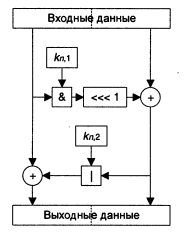

**2** На основе предварительных ключей вычисляются подключи $k_{0}...k_{R}$:
$$k_{n}...g(Kl_{n})$$
где функция g() предствляет собой последовательное выполенине следующих операций: **'1' , '2' , 'w'** .
Операция **'w'** представляет собой умножение блока на фиксированную матрицу V 
##### Матрица V

In [2]:
def print_matrix(list_of_list):
    number_width = len(str(max([max(i) for i in list_of_list])))
    cols = max(map(len, list_of_list))
    output = '+'+('-'*(number_width+2)+'+')*cols + '\n'
    for row in list_of_list:
        for column in row:
            output += '|' + ' {:^{width}d} '.format(column, width = number_width)
        output+='|\n+'+('-'*(number_width+2)+'+')*cols + '\n'
    return output
data1 = [[1,1,1,1],
        [1,2,4,8],
        [1,6,36,216],
        [1,8,64,0],
        ]
print (print_matrix(data1))

+-----+-----+-----+-----+
|  1  |  1  |  1  |  1  |
+-----+-----+-----+-----+
|  1  |  2  |  4  |  8  |
+-----+-----+-----+-----+
|  1  |  6  | 36  | 216 |
+-----+-----+-----+-----+
|  1  |  8  | 64  |  0  |
+-----+-----+-----+-----+



Стоит отметить, что при зашифровывании данных процедура расширения ключа позволяет вычислять ключи *на лету*, т. е. по мере необходимости. Однако при расшифровывании необходимо полностью выполнить расширение ключа до начала преобразований.

## Практическая часть
**Программа выполнена на языке JAVA**



In [ ]:
public static final byte box[] = { 
			(byte)0xa7, (byte)0xd3, (byte)0xe6, (byte)0x71, (byte)0xd0, (byte)0xac, (byte)0x4d, (byte)0x79,
			(byte)0x3a, (byte)0xc9, (byte)0x91, (byte)0xfc, (byte)0x1e, (byte)0x47, (byte)0x54, (byte)0xbd,
			(byte)0x8c, (byte)0xa5, (byte)0x7a, (byte)0xfb, (byte)0x63, (byte)0xb8, (byte)0xdd, (byte)0xd4,
			(byte)0xe5, (byte)0xb3, (byte)0xc5, (byte)0xbe, (byte)0xa9, (byte)0x88, (byte)0x0c, (byte)0xa2,
			(byte)0x39, (byte)0xdf, (byte)0x29, (byte)0xda, (byte)0x2b, (byte)0xa8, (byte)0xcb, (byte)0x4c,
			(byte)0x4b, (byte)0x22, (byte)0xaa, (byte)0x24, (byte)0x41, (byte)0x70, (byte)0xa6, (byte)0xf9,
			(byte)0x5a, (byte)0xe2, (byte)0xb0, (byte)0x36, (byte)0x7d, (byte)0xe4, (byte)0x33, (byte)0xff,
			(byte)0x60, (byte)0x20, (byte)0x08, (byte)0x8b, (byte)0x5e, (byte)0xab, (byte)0x7f, (byte)0x78,
			(byte)0x7c, (byte)0x2c, (byte)0x57, (byte)0xd2, (byte)0xdc, (byte)0x6d, (byte)0x7e, (byte)0x0d,
			(byte)0x53, (byte)0x94, (byte)0xc3, (byte)0x28, (byte)0x27, (byte)0x06, (byte)0x5f, (byte)0xad,
			(byte)0x67, (byte)0x5c, (byte)0x55, (byte)0x48, (byte)0x0e, (byte)0x52, (byte)0xea, (byte)0x42,
			(byte)0x5b, (byte)0x5d, (byte)0x30, (byte)0x58, (byte)0x51, (byte)0x59, (byte)0x3c, (byte)0x4e,
			(byte)0x38, (byte)0x8a, (byte)0x72, (byte)0x14, (byte)0xe7, (byte)0xc6, (byte)0xde, (byte)0x50,
			(byte)0x8e, (byte)0x92, (byte)0xd1, (byte)0x77, (byte)0x93, (byte)0x45, (byte)0x9a, (byte)0xce,
			(byte)0x2d, (byte)0x03, (byte)0x62, (byte)0xb6, (byte)0xb9, (byte)0xbf, (byte)0x96, (byte)0x6b,
			(byte)0x3f, (byte)0x07, (byte)0x12, (byte)0xae, (byte)0x40, (byte)0x34, (byte)0x46, (byte)0x3e,
			(byte)0xdb, (byte)0xcf, (byte)0xec, (byte)0xcc, (byte)0xc1, (byte)0xa1, (byte)0xc0, (byte)0xd6,
			(byte)0x1d, (byte)0xf4, (byte)0x61, (byte)0x3b, (byte)0x10, (byte)0xd8, (byte)0x68, (byte)0xa0,
			(byte)0xb1, (byte)0x0a, (byte)0x69, (byte)0x6c, (byte)0x49, (byte)0xfa, (byte)0x76, (byte)0xc4,
			(byte)0x9e, (byte)0x9b, (byte)0x6e, (byte)0x99, (byte)0xc2, (byte)0xb7, (byte)0x98, (byte)0xbc,
			(byte)0x8f, (byte)0x85, (byte)0x1f, (byte)0xb4, (byte)0xf8, (byte)0x11, (byte)0x2e, (byte)0x00,
			(byte)0x25, (byte)0x1c, (byte)0x2a, (byte)0x3d, (byte)0x05, (byte)0x4f, (byte)0x7b, (byte)0xb2,
			(byte)0x32, (byte)0x90, (byte)0xaf, (byte)0x19, (byte)0xa3, (byte)0xf7, (byte)0x73, (byte)0x9d,
			(byte)0x15, (byte)0x74, (byte)0xee, (byte)0xca, (byte)0x9f, (byte)0x0f, (byte)0x1b, (byte)0x75,
			(byte)0x86, (byte)0x84, (byte)0x9c, (byte)0x4a, (byte)0x97, (byte)0x1a, (byte)0x65, (byte)0xf6,
			(byte)0xed, (byte)0x09, (byte)0xbb, (byte)0x26, (byte)0x83, (byte)0xeb, (byte)0x6f, (byte)0x81,
			(byte)0x04, (byte)0x6a, (byte)0x43, (byte)0x01, (byte)0x17, (byte)0xe1, (byte)0x87, (byte)0xf5,
			(byte)0x8d, (byte)0xe3, (byte)0x23, (byte)0x80, (byte)0x44, (byte)0x16, (byte)0x66, (byte)0x21,
			(byte)0xfe, (byte)0xd5, (byte)0x31, (byte)0xd9, (byte)0x35, (byte)0x18, (byte)0x02, (byte)0x64,
			(byte)0xf2, (byte)0xf1, (byte)0x56, (byte)0xcd, (byte)0x82, (byte)0xc8, (byte)0xba, (byte)0xf0,
			(byte)0xef, (byte)0xe9, (byte)0xe8, (byte)0xfd, (byte)0x89, (byte)0xd7, (byte)0xc7, (byte)0xb5,
			(byte)0xa4, (byte)0x2f, (byte)0x95, (byte)0x13, (byte)0x0b, (byte)0xf3, (byte)0xe0, (byte)0x37
		};
	
	
    private static final String sbox =
            "\ua7d3\ue671\ud0ac\u4d79\u3ac9\u91fc\u1e47\u54bd" +
            "\u8ca5\u7afb\u63b8\uddd4\ue5b3\uc5be\ua988\u0ca2" +
            "\u39df\u29da\u2ba8\ucb4c\u4b22\uaa24\u4170\ua6f9" +
            "\u5ae2\ub036\u7de4\u33ff\u6020\u088b\u5eab\u7f78" +
            "\u7c2c\u57d2\udc6d\u7e0d\u5394\uc328\u2706\u5fad" +
            "\u675c\u5548\u0e52\uea42\u5b5d\u3058\u5159\u3c4e" +
            "\u388a\u7214\ue7c6\ude50\u8e92\ud177\u9345\u9ace" +
            "\u2d03\u62b6\ub9bf\u966b\u3f07\u12ae\u4034\u463e" +
            "\udbcf\ueccc\uc1a1\uc0d6\u1df4\u613b\u10d8\u68a0" +
            "\ub10a\u696c\u49fa\u76c4\u9e9b\u6e99\uc2b7\u98bc" +
            "\u8f85\u1fb4\uf811\u2e00\u251c\u2a3d\u054f\u7bb2" +
            "\u3290\uaf19\ua3f7\u739d\u1574\ueeca\u9f0f\u1b75" +
            "\u8684\u9c4a\u971a\u65f6\ued09\ubb26\u83eb\u6f81" +
            "\u046a\u4301\u17e1\u87f5\u8de3\u2380\u4416\u6621" +
            "\ufed5\u31d9\u3518\u0264\uf2f1\u56cd\u82c8\ubaf0" +
            "\uefe9\ue8fd\u89d7\uc7b5\ua42f\u9513\u0bf3\ue037";
    

Устанавливаем значения таблицы S для табличной замены.

In [ ]:
 private static int[] T0 = new int[256];
    private static int[] T1 = new int[256];
    private static int[] T2 = new int[256];
    private static int[] T3 = new int[256];
    private static int[] T4 = new int[256];
    private static int[] T5 = new int[256];


Создаем переменные для перестановок и умножения на матрицу H.

In [ ]:
static
    {
        for (int x = 0; x < 256; x++)
        {
            char c = sbox.charAt(x/2);
            int s1 = ((x & 1) == 0) ? c >>> 8 : c & 0xff;
            int s2 = s1 << 1;
            if (s2 >= 0x100)
            {
                s2 ^= 0x11d; 
            }
            int s4 = s2 << 1;
            if (s4 >= 0x100)
            {
                s4 ^= 0x11d;
            }
            int s6 = s4 ^ s2;
            int s8 = s4 << 1;
            if (s8 >= 0x100)
            {
                s8 ^= 0x11d; 
            }
            int x2 = x  << 1;
            if (x2 >= 0x100)
            {
                x2 ^= 0x11d; 
            int x4 = x2 << 1;
                
            if (x4 >= 0x100)
            {
                x4 ^= 0x11d; 
            }
            int x6 = x2 ^ x4;
            int x8 = x4 << 1;
            if (x8 >= 0x100)
            {
                x8 ^= 0x11d; 
            }

            T0[x] = (s1 << 24) | (s2 << 16) | (s4 << 8) | s6; 
            T1[x] = (s2 << 24) | (s1 << 16) | (s6 << 8) | s4; 
            T2[x] = (s4 << 24) | (s6 << 16) | (s1 << 8) | s2; 
            T3[x] = (s6 << 24) | (s4 << 16) | (s2 << 8) | s1; 
            T4[x] = (s1 << 24) | (s1 << 16) | (s1 << 8) | s1; 
            T5[x] = (x  << 24) | (x2 << 16) | (x6 << 8) | x8; 
        }
    }

Выполненяется байтовая перестановка и построение нового блока согласно операции '3'.
Согласно матрице H получаем
$[ S[x], 2S[x], 4S[x], 6S[x]]$           -          $T_{0}[x]$

$[2S[x],  S[x], 6S[x], 4S[x]]$           -          $T_{1}[x]$

$[4S[x], 6S[x],  S[x], 2S[x]]$           -          $T_{2}[x]$

$[6S[x], 4S[x], 2S[x],  S[x]]$           -          $T_{3}[x]$

$[ S[x],  S[x],  S[x],  S[x]]$           -          $T_{4}[x]$

$[   x,    2x,    6x,    8x] $           -          $T_{5}[x]$

In [ ]:
public final void keySetup(byte[/*4*N*/] key)
    {

        int N = key.length/4; 
        if (N < 4 || N > 10)
        {
            throw new RuntimeException("Invalid Anubis key size: " + (32*N) + " bits.");
        }
        int[] kappa = new int[N];
        int[] inter = new int[N];
        
        int R = 8 + N;
        roundKeyEnc = new int[R + 1][4];
        roundKeyDec = new int[R + 1][4];

        for (int i = 0, pos = 0; i < N; i++)
        {
            kappa[i] =
                    ((key[pos++]       ) << 24) ^
                    ((key[pos++] & 0xff) << 16) ^
                    ((key[pos++] & 0xff) <<  8) ^
                    ((key[pos++] & 0xff)      );
        }

        // generate R + 1 round keys:
        for (int r = 0; r <= R; r++)
        {
            int K0, K1, K2, K3;
                        /*
                         * generate r-th round key K^r:
                         */
            K0 = T4[(kappa[N - 1] >>> 24)       ];
            K1 = T4[(kappa[N - 1] >>> 16) & 0xff];
            K2 = T4[(kappa[N - 1] >>>  8) & 0xff];
            K3 = T4[(kappa[N - 1]       ) & 0xff];
            for (int t = N - 2; t >= 0; t--)
            {
                K0 = T4[(kappa[t] >>> 24)       ] ^
                        (T5[(K0 >>> 24)       ] & 0xff000000) ^
                        (T5[(K0 >>> 16) & 0xff] & 0x00ff0000) ^
                        (T5[(K0 >>>  8) & 0xff] & 0x0000ff00) ^
                        (T5[(K0       ) & 0xff] & 0x000000ff);
                K1 = T4[(kappa[t] >>> 16) & 0xff] ^
                        (T5[(K1 >>> 24)       ] & 0xff000000) ^
                        (T5[(K1 >>> 16) & 0xff] & 0x00ff0000) ^
                        (T5[(K1 >>>  8) & 0xff] & 0x0000ff00) ^
                        (T5[(K1       ) & 0xff] & 0x000000ff);
                K2 = T4[(kappa[t] >>>  8) & 0xff] ^
                        (T5[(K2 >>> 24)       ] & 0xff000000) ^
                        (T5[(K2 >>> 16) & 0xff] & 0x00ff0000) ^
                        (T5[(K2 >>>  8) & 0xff] & 0x0000ff00) ^
                        (T5[(K2       ) & 0xff] & 0x000000ff);
                K3 = T4[(kappa[t]       ) & 0xff] ^
                        (T5[(K3 >>> 24)       ] & 0xff000000) ^
                        (T5[(K3 >>> 16) & 0xff] & 0x00ff0000) ^
                        (T5[(K3 >>>  8) & 0xff] & 0x0000ff00) ^
                        (T5[(K3       ) & 0xff] & 0x000000ff);
            }
            roundKeyEnc[r][0] = K0;
            roundKeyEnc[r][1] = K1;
            roundKeyEnc[r][2] = K2;
            roundKeyEnc[r][3] = K3;

                        /*
                         * compute kappa^{r+1} from kappa^r:
                         */
            for (int i = 0; i < N; i++)
            {
                inter[i] =
                        T0[(kappa[     i         ] >>> 24)       ] ^
                        T1[(kappa[(N + i - 1) % N] >>> 16) & 0xff] ^
                        T2[(kappa[(N + i - 2) % N] >>>  8) & 0xff] ^
                        T3[(kappa[(N + i - 3) % N]       ) & 0xff];
            }
            kappa[0] =
                    (T0[4*r    ] & 0xff000000) ^
                    (T1[4*r + 1] & 0x00ff0000) ^
                    (T2[4*r + 2] & 0x0000ff00) ^
                    (T3[4*r + 3] & 0x000000ff) ^
                    inter[0];
            for (int i = 1; i < N; i++)
            {
                kappa[i] = inter[i];
            }
        }

        // generate inverse key schedule: K'^0 = K^R, K'^R = K^0, K'^r = theta(K^{R-r}):
        for (int i = 0; i < 4; i++)
        {
            roundKeyDec[0][i] = roundKeyEnc[R][i];
            roundKeyDec[R][i] = roundKeyEnc[0][i];
        }
        for (int r = 1; r < R; r++)
        {
            for (int i = 0; i < 4; i++)
            {
                int v = roundKeyEnc[R - r][i];
                roundKeyDec[r][i] =
                        T0[T4[(v >>> 24)       ] & 0xff] ^
                        T1[T4[(v >>> 16) & 0xff] & 0xff] ^
                        T2[T4[(v >>>  8) & 0xff] & 0xff] ^
                        T3[T4[(v       ) & 0xff] & 0xff];
            }
        }
    } // keySetup

**Процедура расширения ключей и установки порядка ключей в соответствии с раундом для зашифровки и рашифровки**
Вычисление количества раундов $int R = 8 + N;$ где N - количество 32 битных блоков в нулевом ключе. 
$int N = key.length/4;$ определяем параметр N и рассматриваем только первые $4*N$ байты.

$$  for (int i = 0, pos = 0; i < N; i++)
        {
            kappa[i] =
                    ((key[pos++]       ) << 24) ^
                    ((key[pos++] & 0xff) << 16) ^
                    ((key[pos++] & 0xff) <<  8) ^
                    ((key[pos++] & 0xff)      );
        } $$
Создание 16 байтовых массивов для представления ключа.
##### Генерируем ключи для каждого раунда
 

In [ ]:
for (int r = 0; r <= R; r++)
        {
            int K0, K1, K2, K3;

           

##### Выполняем операцию наложения ключа r-го раунда k[r]
Операция выполняется побитовой логической операцией *исключающее ИЛИ (XOR)* применяемая к каждому биту массива
$$b_{i,j} = a_{i,j} ⊕ k[r]_{i,j}$$

In [ ]:
 K0 = T4[(kappa[N - 1] >>> 24)       ];
            K1 = T4[(kappa[N - 1] >>> 16) & 0xff];
            K2 = T4[(kappa[N - 1] >>>  8) & 0xff];
            K3 = T4[(kappa[N - 1]       ) & 0xff];
            for (int t = N - 2; t >= 0; t--)
            {
                K0 = T4[(kappa[t] >>> 24)       ] ^
                        (T5[(K0 >>> 24)       ] & 0xff000000) ^
                        (T5[(K0 >>> 16) & 0xff] & 0x00ff0000) ^
                        (T5[(K0 >>>  8) & 0xff] & 0x0000ff00) ^
                        (T5[(K0       ) & 0xff] & 0x000000ff);
                K1 = T4[(kappa[t] >>> 16) & 0xff] ^
                        (T5[(K1 >>> 24)       ] & 0xff000000) ^
                        (T5[(K1 >>> 16) & 0xff] & 0x00ff0000) ^
                        (T5[(K1 >>>  8) & 0xff] & 0x0000ff00) ^
                        (T5[(K1       ) & 0xff] & 0x000000ff);
                K2 = T4[(kappa[t] >>>  8) & 0xff] ^
                        (T5[(K2 >>> 24)       ] & 0xff000000) ^
                        (T5[(K2 >>> 16) & 0xff] & 0x00ff0000) ^
                        (T5[(K2 >>>  8) & 0xff] & 0x0000ff00) ^
                        (T5[(K2       ) & 0xff] & 0x000000ff);
                K3 = T4[(kappa[t]       ) & 0xff] ^
                        (T5[(K3 >>> 24)       ] & 0xff000000) ^
                        (T5[(K3 >>> 16) & 0xff] & 0x00ff0000) ^
                        (T5[(K3 >>>  8) & 0xff] & 0x0000ff00) ^
                        (T5[(K3       ) & 0xff] & 0x000000ff);
            }
            roundKeyEnc[r][0] = K0;
            roundKeyEnc[r][1] = K1;
            roundKeyEnc[r][2] = K2;
            roundKeyEnc[r][3] = K3;

                        

**Массив блоков ключа для шифрования и дешифрования**

In [ ]:
 roundKeyEnc = new int[R + 1][4];
 roundKeyDec = new int[R + 1][4];

**Вычисляем остальные промежуточные ключи** $Kl_{1}...Kl{R}$:
$$Kl_{j} = f(Kl_{j-1}),$$
где f() - совокупность оперций '1' '2' '3' '4'; в операции '4' в качестве ключа раунда используются соответствующая из констант $с[r]$ (в коде **kappa** ), которые, в свою очередь, определяются следующим образом:
$$c[r]_{0,j} = S(4*(r-1)+j)$$
для j = 0...3. Остальные байты $c[r]_{i,j}$ являюся нулевыми.

In [ ]:
for (int i = 0; i < N; i++)
            {
                inter[i] =
                        T0[(kappa[     i         ] >>> 24)       ] ^
                        T1[(kappa[(N + i - 1) % N] >>> 16) & 0xff] ^
                        T2[(kappa[(N + i - 2) % N] >>>  8) & 0xff] ^
                        T3[(kappa[(N + i - 3) % N]       ) & 0xff];
            }
            kappa[0] =
                    (T0[4*r    ] & 0xff000000) ^
                    (T1[4*r + 1] & 0x00ff0000) ^
                    (T2[4*r + 2] & 0x0000ff00) ^
                    (T3[4*r + 3] & 0x000000ff) ^
                    inter[0];
            for (int i = 1; i < N; i++)
            {
                kappa[i] = inter[i];
            }
        } 

**Создаем инверсионный список ключей кадого раунда для дешифрования и устанавливаем ключ**

In [ ]:
for (int i = 0; i < 4; i++)
        {
            roundKeyDec[0][i] = roundKeyEnc[R][i];
            roundKeyDec[R][i] = roundKeyEnc[0][i];
        }
        for (int r = 1; r < R; r++)
        {
            for (int i = 0; i < 4; i++)
            {
                int v = roundKeyEnc[R - r][i];
                roundKeyDec[r][i] =
                        T0[T4[(v >>> 24)       ] & 0xff] ^
                        T1[T4[(v >>> 16) & 0xff] & 0xff] ^
                        T2[T4[(v >>>  8) & 0xff] & 0xff] ^
                        T3[T4[(v       ) & 0xff] & 0xff];
            }
        }
    }

##### Создаем функцию для шифрования и дешифрования

In [ ]:
protected final void crypt(byte[/*16*/] block, int[/*R + 1*/][/*4*/] roundKey)
    {
        int[] state = new int[4];
        int[] inter = new int[4];
        int R = roundKey.length - 1;

**Делим блок входных данных на массивы и определяем нулевой ключ**

In [ ]:
for (int i = 0, pos = 0; i < 4; i++)
        {
            state[i] =
                    ((block[pos++]       ) << 24) ^
                    ((block[pos++] & 0xff) << 16) ^
                    ((block[pos++] & 0xff) <<  8) ^
                    ((block[pos++] & 0xff)      ) ^
                    roundKey[0][i];
        }

**Проходим нашими операциями по всем раундам кроме последнего, так как там другой список операций**

In [ ]:
for (int r = 1; r < R; r++)
        {
            inter[0] =
                    T0[(state[0] >>> 24)       ] ^
                    T1[(state[1] >>> 24)       ] ^
                    T2[(state[2] >>> 24)       ] ^
                    T3[(state[3] >>> 24)       ] ^
                    roundKey[r][0];
            inter[1] =
                    T0[(state[0] >>> 16) & 0xff] ^
                    T1[(state[1] >>> 16) & 0xff] ^
                    T2[(state[2] >>> 16) & 0xff] ^
                    T3[(state[3] >>> 16) & 0xff] ^
                    roundKey[r][1];
            inter[2] =
                    T0[(state[0] >>>  8) & 0xff] ^
                    T1[(state[1] >>>  8) & 0xff] ^
                    T2[(state[2] >>>  8) & 0xff] ^
                    T3[(state[3] >>>  8) & 0xff] ^
                    roundKey[r][2];
            inter[3] =
                    T0[(state[0]       ) & 0xff] ^
                    T1[(state[1]       ) & 0xff] ^
                    T2[(state[2]       ) & 0xff] ^
                    T3[(state[3]       ) & 0xff] ^
                    roundKey[r][3];
            for (int i = 0; i < 4; i++)
            {
                state[i] = inter[i];
            }
        }


**Для последнего раунда**

In [ ]:
 inter[0] =
                (T0[(state[0] >>> 24)       ] & 0xff000000) ^
                (T1[(state[1] >>> 24)       ] & 0x00ff0000) ^
                (T2[(state[2] >>> 24)       ] & 0x0000ff00) ^
                (T3[(state[3] >>> 24)       ] & 0x000000ff) ^
                roundKey[R][0];
        inter[1] =
                (T0[(state[0] >>> 16) & 0xff] & 0xff000000) ^
                (T1[(state[1] >>> 16) & 0xff] & 0x00ff0000) ^
                (T2[(state[2] >>> 16) & 0xff] & 0x0000ff00) ^
                (T3[(state[3] >>> 16) & 0xff] & 0x000000ff) ^
                roundKey[R][1];
        inter[2] =
                (T0[(state[0] >>>  8) & 0xff] & 0xff000000) ^
                (T1[(state[1] >>>  8) & 0xff] & 0x00ff0000) ^
                (T2[(state[2] >>>  8) & 0xff] & 0x0000ff00) ^
                (T3[(state[3] >>>  8) & 0xff] & 0x000000ff) ^
                roundKey[R][2];
        inter[3] =
                (T0[(state[0]       ) & 0xff] & 0xff000000) ^
                (T1[(state[1]       ) & 0xff] & 0x00ff0000) ^
                (T2[(state[2]       ) & 0xff] & 0x0000ff00) ^
                (T3[(state[3]       ) & 0xff] & 0x000000ff) ^
                roundKey[R][3];

**Обратное преобразование блока из массивов, но уже в зашифрованном виде**

In [ ]:
 for (int i = 0, pos = 0; i < 4; i++)
        {
            int w = inter[i];
            block[pos++] = (byte)(w >>> 24);
            block[pos++] = (byte)(w >>> 16);
            block[pos++] = (byte)(w >>>  8);
            block[pos++] = (byte)(w       );
        }

##### Функции для передачи блока данных и нулевой ключ в функцию шифрования/дешифрование
**Функция передачи шифрования**

In [ ]:
 public final void encrypt(byte[/*16*/] block)
    {
        crypt(block, roundKeyEnc);
    } /

**Функция передачи дешифрования**

In [ ]:
 public final void decrypt(byte[/*16*/] block)
    {
        crypt(block, roundKeyDec);
    } 

##### Линейный конгруэнтный генератор
Для определения начального нулевого ключа используется данный генератор ГПСЧ.
Для реализации алгоритма необходиом задать четыре параметра:

Диапазон значений **m**, при этом $m > 0$.
Множитель **a** ($0 <= a <= m$).
Инкрементирующее значение **c** ($0 <= c <= m$).
Начальное значение **X0** ($0 <= X0 < m$).

Вычисление значений проводится по формуле:
$$X_{i+1} = (aX_{i} + c)mod(m)$$

В данном алгоритме много зависит от **m**. Числа, генерируемы этим ГПСЧ будут повторятся с периодом **m**.
В моем случае ГПСЧ генерирует 256 случайных значение, из них нам нужно несколько для инициализации ключа, поэтому из этих случайных значений мы уже берем случайное значение встроенного рандомайзера.

##### Рализация

In [ ]:
public static int random() { // ленейный конгруэнтный генератор выбирает значение ключа
        int a=7, c=4;
        int m, x=7;
        int start = 0;
        int cancel = 255;
        m=256;
        int arr[] = new int[1000];
        
        for (int i = 0; i<1000; i++) {
        arr[i]=(a*x+c)%m;
        x+=7;
        //System.out.println(arr[i]);
        }
        int q = start + (int) (Math.random() * cancel);
        return arr[q];
	}

##### Функция выбор блока
Так как алгоритм может работать с ключами разного размера от 128 битов до 320 бит с шагом в 32 бита. Следоватьльно нам нужно выбрать блок $32*N$ 
где $4<=N<=10$
для этого я создал функцию которая определяет N случайным образом.

In [ ]:
 public static int viborblocka()
    {
    	int start = 4;
    	int cancel = 10;
    	int block = start + (int) (Math.random() * cancel);
    	while (block < 4 || block > 10) {
    		
    	if(block <= 10 && block > 4)
    	{
    	return block;
    	}
    	else {
    		block = start + (int) (Math.random() * cancel);
    	}
    	}
    	return block;
    }

#### Пользовательская функция
Эта функция считывает текст который нужно зашифровать, выбирает длинну нулевого ключа и генерирует нулевой ключ.
После данные передаются в функции шифрования и дешифрования. В консоль выводится: *длинна ключа (32N-bit keys) , шифр текст (CT), ключ(KEY) , расшифрованнный текст ( decripted text  )* 

**Реализация**

Этот блок кода считывает текст с клавиатуры и преобразует его в шестнадцатеричный формат *UTF - 8*

In [ ]:
 public static void funk_shifr() throws UnsupportedEncodingException
    {

        Anubis a = new Anubis();
        byte[] key,block;
        block = new byte[2];
        String text = new String();
		  Scanner read = new Scanner(System.in);System.out.println("Введите текст: ");
		  text = read.nextLine();
		  if(text.length()==0)
		  {
			  System.out.println("Вы ничего не ввели.");
			  System.exit(0);
			  
		  }
		  else if(text.length() < 16 )
		  {
			  for(int p =text.length();p<=16;)
			  {
				  text += ' ';
				  p++;
			  }
		  }
		  block = text.getBytes("UTF-8");
        System.out.println("--------------------------------------------------");

Выбираем N и генерируем нулевой ключ в соответствии с размером с помощью нашего ГПСЧ

In [ ]:
int number_of_block = viborblocka();
        for (int N =number_of_block ; N <=number_of_block ; N++) 
        {
                     
            System.out.println((32*N) + "-bit keys:");
            key = new byte[4*N];
            for (int i = 0; i < key.length; i++)
            {
                key[i] = box[random()]; 
            }

Передаем данные в функции и создаем вывод в консоль

In [ ]:
 for (int k = shifr; k <=shifr; k++)
            {
                // set the k-th bit:
                key[k/8] |= (box[random()] >>> (k%8)); // меняется одно из значений
                System.out.println("\tKEY: " + DatatypeConverter.printHexBinary(key));
                // setup key:
                a.keySetup(key);
                // encrypt the null block:
               // System.out.println("\tBlock1 " + DatatypeConverter.printHexBinary(block));
                a.encrypt(block);
                System.out.println("\tCT: " + DatatypeConverter.printHexBinary(block));
                // getDecrypted:
                a.decrypt(block);
               // System.out.println("\tBlock2 " + DatatypeConverter.printHexBinary(block));
                byte[] s = DatatypeConverter.parseHexBinary(DatatypeConverter.printHexBinary(block));
        	    System.out.println("decripted text - " + new String(s));
                key[k/8] = 0;
            }
            System.out.println("--------------------------------------------------");
        }
    }

**Вызов функции - запуск программы**

In [ ]:
   public static void main(String[] args) throws UnsupportedEncodingException
    {
        Anubis.funk_shifr();
    	
    }
    
} 

### Запуск и тестирование программы
**Запустив мы видим**
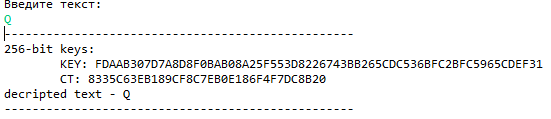

Сделаем несколько тестов
**1.** Вводим ФИО номер группы и специальность 
*Bulychev Nikita Sergeevich, 01.05.1999, 447 group, Information security of telecommunication systems*
На выходе получаем:
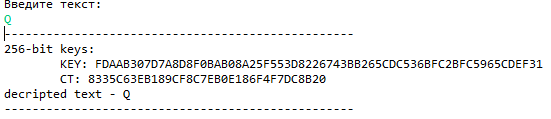

256-bit keys:
	KEY: 56C18A16EB9786B54C2E4C35650473246C0963EDA4701B91C51B2CB88018AF07
	CT: AFBAF5375CD0F83D77A0C5F5C45B7A7C536572676565766963682C2030312E30352E313939392C203434372067726F75702C20496E666F726D6174696F6E207365637572697479206F662074656C65636F6D6D756E69636174696F6E2073797374656D73
decripted text - Bulychev Nikita Sergeevich, 01.05.1999, 447 group, Information security of telecommunication systems

**Повторим операцию несколько раз**


192-bit keys:
	KEY: 800F6A4A823EC917A93333AF1024C8FE2B5480AF85D37B6A
    
	CT: 80112F2878621D336A9C01F43E3A957E536572676565766963682C2030312E30352E313939392C203434372067726F75702C20496E666F726D6174696F6E207365637572697479206F662074656C65636F6D6D756E69636174696F6E2073797374656D73
decripted text - Bulychev Nikita Sergeevich, 01.05.1999, 447 group, Information security of telecommunication systems


320-bit keys:
	KEY: 21D2A1CB62A8E481DA45A46DCEA7A90BE76994C768294CCA1DD7DF364EF0FC518051959830B018F3
    
	CT: E2A79246C754A424126E5F61255BEC57536572676565766963682C2030312E30352E313939392C203434372067726F75702C20496E666F726D6174696F6E207365637572697479206F662074656C65636F6D6D756E69636174696F6E2073797374656D73
decripted text - Bulychev Nikita Sergeevich, 01.05.1999, 447 group, Information security of telecommunication systems


160-bit keys:
	KEY: 302EEC793BBF5970B4FDC7A97E51FEE5867CF630
    
	CT: 4E1067FC2FF8DAA090C0B2EF3B38B95C536572676565766963682C2030312E30352E313939392C203434372067726F75702C20496E666F726D6174696F6E207365637572697479206F662074656C65636F6D6D756E69636174696F6E2073797374656D73
decripted text - Bulychev Nikita Sergeevich, 01.05.1999, 447 group, Information security of telecommunication systems
**2** Введем одну букву *Q*
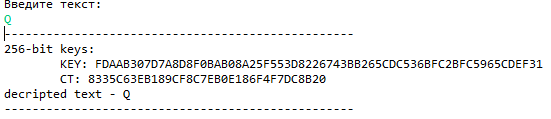


#### Вывод
Как видим, алгоритм работает с текстом любой длинны и во всем своем диапазоне. Из минусов - не приспособлен к работе с расским языком.